Text(0.5, 1.0, 'Jump Diffusion Process')

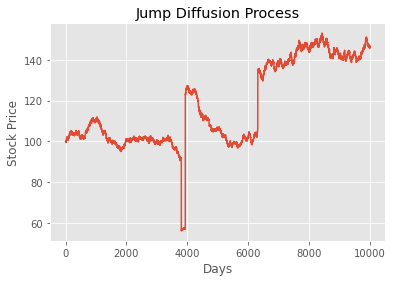

In [2]:
 import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =10000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

In [3]:
data = pd.read_csv("C:/Users/saxen/Downloads/data_trial.csv")
data['date'] = pd.to_datetime(data['date'])

In [4]:
data

,date,id,company_id,round_count,status,post_money_valuation,deal_amount,total_capital_raised,bloat,dilutive_impact,deal_type
0,2007-05-22,90ecfa03-051e-4b27-83ec-7bd80bd8279e,9328e5f3-503d-4ae5-9201-be6c161c9d80,1,Completed,5570000,560000,560000,0.100539,0.100539,Early Stage VC
1,2007-07-02,99372b0b-1792-4c08-9200-2689f57d909c,9328e5f3-503d-4ae5-9201-be6c161c9d80,2,Completed,10390000,3500000,4060000,0.390760,0.336862,Early Stage VC
2,2009-04-24,c5f5568c-0b36-4a95-be2e-08960697d6bf,9328e5f3-503d-4ae5-9201-be6c161c9d80,3,Completed,25260000,8090000,12150000,0.480998,0.320269,Later Stage VC
3,2010-05-19,c6562fdf-4c5f-46db-a380-585bff7158be,9328e5f3-503d-4ae5-9201-be6c161c9d80,4,Completed,46520000,15000000,27150000,0.583620,0.322442,Later Stage VC
4,2011-09-19,a6c2c8fa-2d6c-4885-9237-f24a57eb040d,9328e5f3-503d-4ae5-9201-be6c161c9d80,5,Completed,100580000,20000000,47150000,0.468781,0.198847,Later Stage VC
5,2013-03-22,4281b0a7-c563-4b25-a225-0f6b83b1353a,9328e5f3-503d-4ae5-9201-be6c161c9d80,6,Completed,206990000,30000000,77150000,0.372723,0.144935,Later Stage VC
6,2014-05-14,d31987d3-008e-488e-b1af-4ed65598b39d,9328e5f3-503d-4ae5-9201-be6c161c9d80,7,Completed,578900000,40500000,117650000,0.203230,0.069960,Later Stage VC
7,2015-12-08,8b7d93bc-fc1a-4708-a519-b6cd410dc3d6,9328e5f3-503d-4ae5-9201-be6c161c9d80,8,Completed,859820000,65000000,182650000,0.212428,0.075597,Later Stage VC
8,2018-08-22,40103704-092e-4012-b425-2e40f16472f2,9328e5f3-503d-4ae5-9201-be6c161c9d80,9,Completed,1500000000,350000000,532650000,0.355100,0.233333,Later Stage VC
9,2020-01-31,89898e5d-0a8d-4208-9ada-53b446aa2f6a,9328e5f3-503d-4ae5-9201-be6c161c9d80,10,Completed,1713760000,245000000,245000000,0.142961,0.142961,IPO


In [20]:
lambada = []
for i in range(1,10):
    jump=0
    jump = (data["post_money_valuation"][i] - data['deal_amount'][i] - data["post_money_valuation"][i-1])/data["post_money_valuation"][i-1]
    time = (data['date'][i] - data['date'][i-1]).days
    lambada.append(jump*365/time)

lambada_IPO = lambada[8]

lambada = lambada[:7]

print(np.mean(lambada))
print(np.std(lambada))
intensity = len(lambada)/(((data['date'][len(data)-1] - data['date'][0]).days)/365)
print(intensity)


0.7698445339998716
0.6601671739768131
0.4612745983029428


In [6]:
geom = []
for i in range(1,10):
    ret=0
    ret = (data["deal_amount"][i])/data["post_money_valuation"][i-1]
    time = (data['date'][i] - data['date'][i-1]).days
    geom.append(ret*365/time)
geom= geom[1:]
geom



[0.42930688059922834,
 0.5557585723856507,
 0.3215609714841493,
 0.19794284061534012,
 0.17085285538376332,
 0.07152338324746006,
 0.15038219561442903,
 0.11312460468058191]

1500000000

Text(0.5, 1.0, 'Jump Diffusion Process')

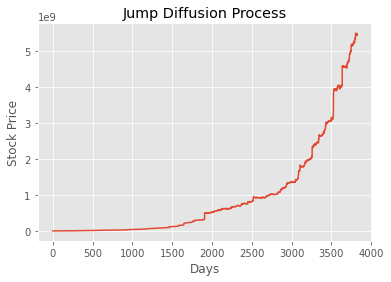

In [25]:
S = data['post_money_valuation'][0] # current stock price
T = ((data['date'][len(data)-1] - data['date'][0]).days)/365 # time to maturity

##Selection bias removal
prob_bankruptcy = 0.002155258
prob_IPO = 0.031291159
prob_other = 0.966553582

r = np.mean(geom) # risk free rate
m = np.mean(np.array(lambada)*np.array(prob_other) + lambada_IPO*prob_IPO) # meean of jump size
v = np.std(np.array(lambada)*np.array(prob_other) + lambada_IPO*prob_IPO) # standard deviation of jump
lam = intensity # intensity of jump i.e. number of jumps per annum
steps =  3825 #time steps
Npaths = 10000 # number of paths to simulate
sigma = np.std(geom) # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(np.mean(j,axis=1))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

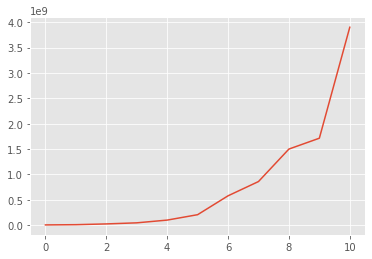

In [27]:
plt.plot(data['post_money_valuation'])

Call Option

In [28]:
K = 4000000000
rf=0.02
mcprice = np.maximum(np.mean(j,axis=1)[-1]-K,0)*np.exp(-rf*T)
mcprice

1075761857.4686704

Simulation

Text(0.5, 1.0, 'Simulated price')

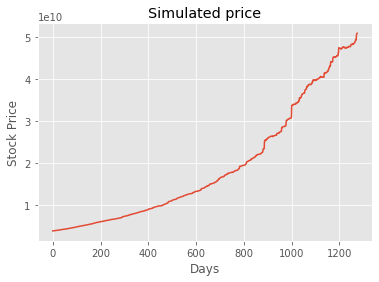

In [29]:
S = data['post_money_valuation'][len(data)-1] # current stock price
T = 5 # time to maturity
r = np.mean(geom) # risk free rate
m = np.mean(lambada) # meean of jump size
v = np.std(lambada) # standard deviation of jump
lam = intensity # intensity of jump i.e. number of jumps per annum
steps =  1275 #time steps
Npaths = 10000 # number of paths to simulate
sigma = np.std(geom) # annaul standard deviation , for weiner process

j_sim = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)
plt.plot(np.mean(j_sim,axis=1))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Simulated price')

Liquidation method

In [30]:
theta=0.5
V_thresh = data['post_money_valuation'][len(data)-1]
u1 = (sigma**2/2 - r - lam*np.log(theta) + np.sqrt((sigma**2/2 - r - lam*np.log(theta))**2 +(2*sigma**2+2*lam*(np.log(theta))**2)*(lam+rf)))/(sigma**2+lam*(np.log(theta))**2)
a1= (1/u1)*(V_thresh**(1-u1))

In [31]:
V = np.mean(j,axis=1)[-1]
Liq_val = a1*(V**u1)
Liq_val

3661381157.978583

In [32]:
##Assuming K = liquidation value
mcprice = np.maximum(np.mean(j,axis=1)[-1]-Liq_val,0)*np.exp(-rf*T)
mcprice

1624949371.7322774